In [38]:
import numpy as np, matplotlib.pyplot as plt
from scipy.fftpack import fft, fftfreq

In [39]:
plt.rc("figure", figsize=(10,7))

In [40]:
def fun(t,f):
    return np.sin(2*np.pi*f*t) - 1/2*np.sin(2*np.pi*2*f*t) - 1/2*np.sin(2*np.pi*f/4*t)

In [41]:
f = 400
ns = 16
T = 1/f
dt = T/ns

In [42]:
def make_ftt_plot(t, pos_only=True):
    fig = plt.figure(figsize=(15,5))
    axf = fig.add_subplot(121)

    axf.plot(t,fun(t,f),'k-')
    axf.plot(t,fun(t,f),'ro')

    ln = len(t)
    axfft = fig.add_subplot(122)
    Y1 = fft(fun(t,f))/ln
    F1 = fftfreq(ln,dt)
    
    I = True
    if pos_only: 
        I = F1 >=0 # Only plot positive freq.
    axfft.vlines(F1[I], 0, np.abs(Y1[I]))
    axfft.set_ylim(0, np.abs(Y1[I]).max())
    axfft.set_xlabel("Frequency [Hz]")
    axfft.set_ylabel("Amplitude")

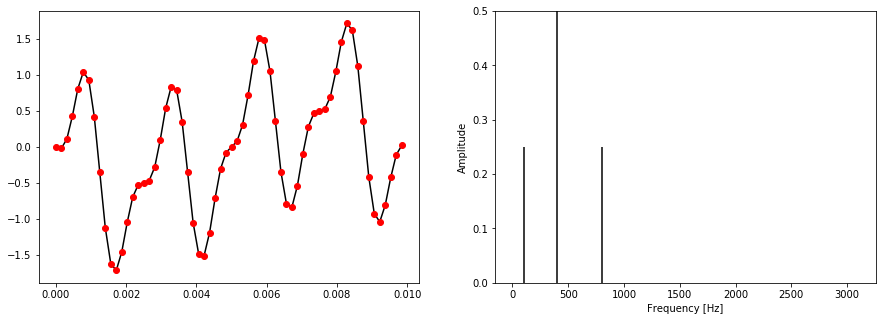

In [43]:
t=np.linspace(0, dt*(ns*4-1), ns*4)
make_ftt_plot(t)

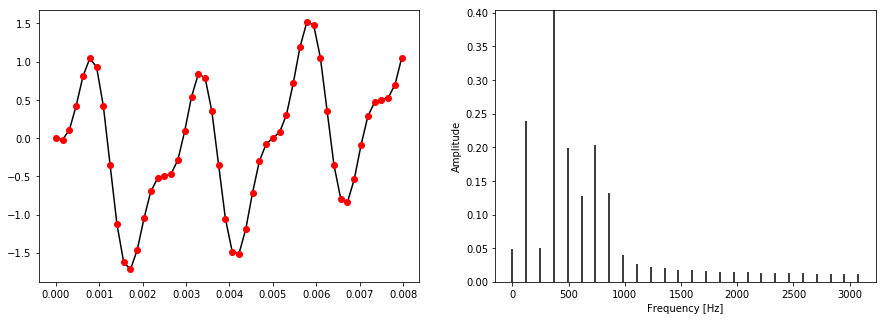

In [44]:
t=np.linspace(0, dt*(ns*3.25-1), int(ns*3.25))
make_ftt_plot(t)

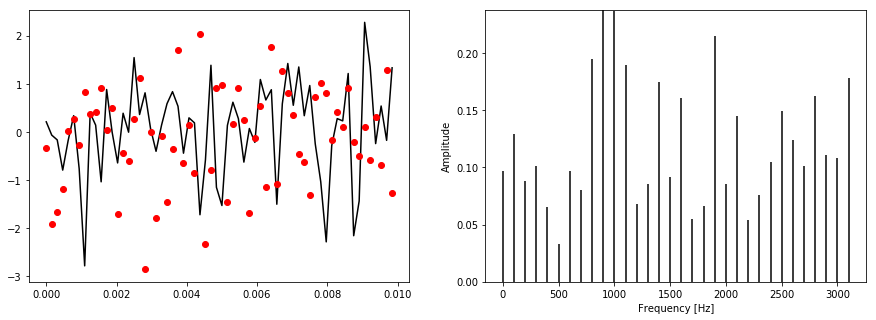

In [45]:
def fun(t,f):
    return np.random.normal(0,1,size=len(t))
t=np.linspace(0, dt*(ns*4-1), ns*4)
make_ftt_plot(t)

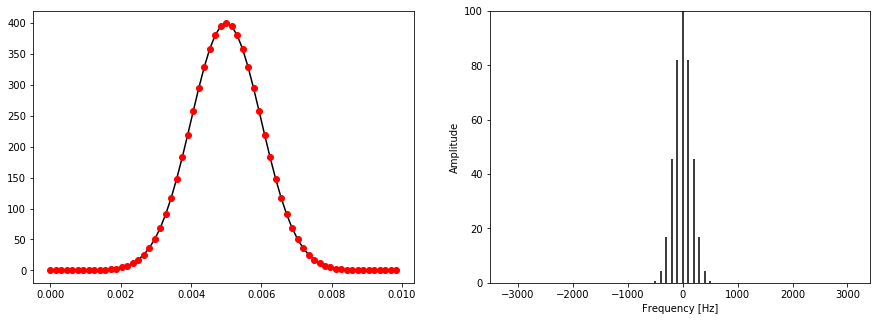

In [47]:
from scipy.stats import norm
def fun(t,f):
    return norm.pdf(t,0.005, .001)
t=np.linspace(0, dt*(ns*4-1), ns*4)
make_ftt_plot(t, False)